In [1]:
import pandas as pd 
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as st

# Data Understanding :
# 1) Data Exploration
## importing 'Telco_customer_churn' dataset


In [2]:
data = pd.read_csv('Telco_customer_churn.csv')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
data.shape

(7043, 33)

#### The dataset is composed of 7043 rows and 33 columns, the column types go as following :

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

##### The column Total Charges must be converted from object to float

In [5]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')



## Missing values : 

In [6]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

#### We have 11 missing values for the Total Charges feature

## Exploring categorical features and their different values :

In [7]:
for i in data.columns:
    if len( data[i].unique()) < 1000 :
        print(data[i].name,' ',data[i].unique(),'length : ',len( data[i].unique()))

Count   [1] length :  1
Country   ['United States'] length :  1
State   ['California'] length :  1
Gender   ['Male' 'Female'] length :  2
Senior Citizen   ['No' 'Yes'] length :  2
Partner   ['No' 'Yes'] length :  2
Dependents   ['No' 'Yes'] length :  2
Tenure Months   [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0] length :  73
Phone Service   ['Yes' 'No'] length :  2
Multiple Lines   ['No' 'Yes' 'No phone service'] length :  3
Internet Service   ['DSL' 'Fiber optic' 'No'] length :  3
Online Security   ['Yes' 'No' 'No internet service'] length :  3
Online Backup   ['Yes' 'No' 'No internet service'] length :  3
Device Protection   ['No' 'Yes' 'No internet service'] length :  3
Tech Support   ['No' 'Yes' 'No internet service'] length :  3
Streaming TV   ['No' 'Yes' 'No internet service'] length :  3
Streaming Movie

## Histogram plots on some features based on churn value

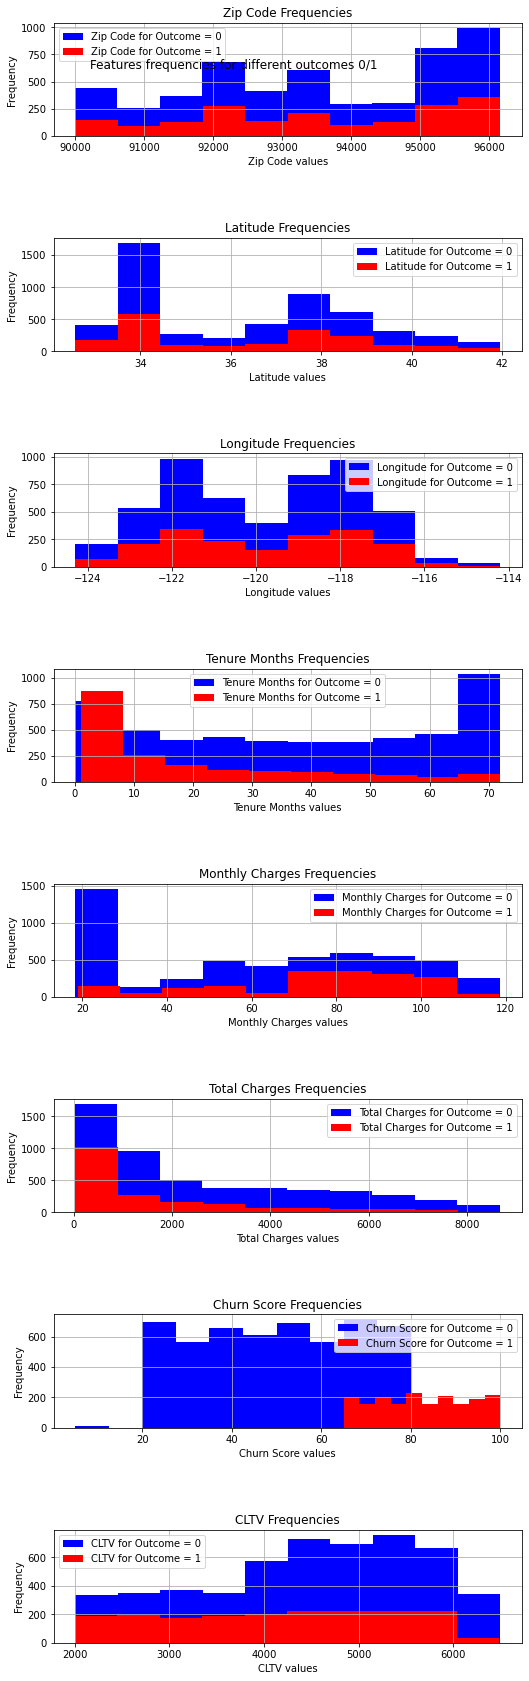

In [8]:
#Preparing plot


rcParams['figure.figsize'] = 10, 25

outcome_0=data[data['Churn Value']==0]
outcome_1=data[data['Churn Value']==1]
names=[]
for i in data.columns:
    if not((isinstance(data[i][1],str))) and (i != 'Churn Value') and (i!= 'Count'):
        names.append(i)


    # init figure
fig, axs = plt.subplots(len(names), 1)
fig.suptitle('Features frequencies for different outcomes 0/1')
plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1, wspace = 0.2, hspace = 0.9)

for i in data.columns:
    if not((isinstance(data[i][1],str))):
        if(i != 'Churn Value') and (i!='Count'):
            ax = axs[names.index(i)]
        
            outcome_0[i].plot(kind='hist',  subplots=True, ax=ax,
                                    sharex=False, color="blue", legend=True,
                                    label=i + ' for Outcome = 0')
            outcome_1[i].plot(kind='hist',  subplots=True, ax=ax,
                                     sharex=False, color="red", legend=True,
                                     label=i + ' for Outcome = 1')
            ax.set_xlabel(i + ' values')
            ax.set_title(i + ' Frequencies')
            ax.grid('on')
            fig.savefig('Frequencies.png')
            
        
plt.show()   

TypeError: no numeric data to plot

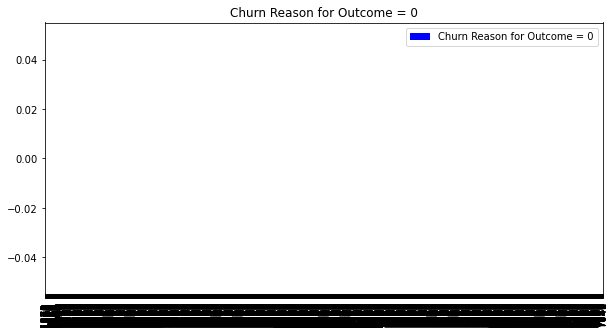

In [16]:
fig4, ax1 = plt.subplots()
subplot()
plot(x, y)


## Percentage of churners to no churners

Churn :  1869 //  No churn :  5174


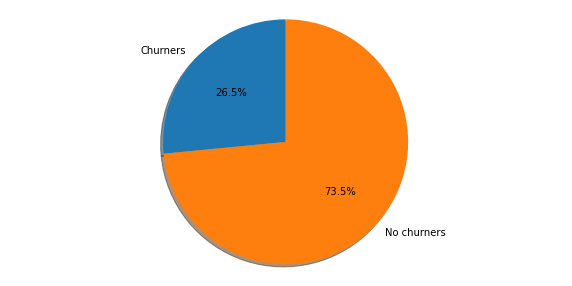

In [9]:
rcParams['figure.figsize'] = 10, 5
print('Churn : ',outcome_1['City'].size,'//',' No churn : ',outcome_0['City'].size)
fracs=[outcome_1['City'].size/data['City'].size,outcome_0['City'].size/data['City'].size]
labels=['Churners','No churners']
fig1, ax1 = plt.subplots()
ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('pics/'+'Churners'+'.png')
plt.show()

####  Result : from 7043 clients, only 1869 are churners. They are our main focus but only represent 26.5% of the total data. This is considered undersampling.

## City Column

In [10]:
print(outcome_1.describe(include='all'))
print(outcome_0.describe(include='all'))
# This gives us the city which has the highest churns which is Los Angeles (same for no churn)



        CustomerID   Count        Country       State         City  \
count         1869  1869.0           1869        1869         1869   
unique        1869     NaN              1           1          833   
top     9191-MYQKX     NaN  United States  California  Los Angeles   
freq             1     NaN           1869        1869           90   
mean           NaN     1.0            NaN         NaN          NaN   
std            NaN     0.0            NaN         NaN          NaN   
min            NaN     1.0            NaN         NaN          NaN   
25%            NaN     1.0            NaN         NaN          NaN   
50%            NaN     1.0            NaN         NaN          NaN   
75%            NaN     1.0            NaN         NaN          NaN   
max            NaN     1.0            NaN         NaN          NaN   

            Zip Code                Lat Long     Latitude    Longitude  \
count    1869.000000                    1869  1869.000000  1869.000000   
unique     

Number of unique cities : 1129


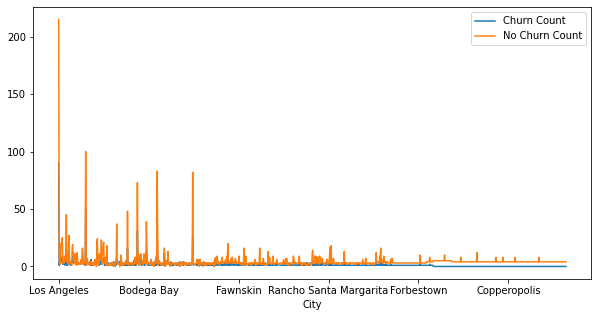

In [90]:
dictCity={'City':[],
         'Churn Count':[],
          'No Churn Count':[]
         }
print("Number of unique cities :",data["City"].unique().size)
for c in data["City"].unique():
    #print(c,"Count :",outcome_1["City"][outcome_1["City"]==c].size)
    dictCity['City'].append(c)
    
    dictCity['Churn Count'].append(outcome_1["City"][outcome_1["City"]==c].size)
    dictCity['No Churn Count'].append(outcome_0["City"][outcome_0["City"]==c].size)
 
dfCity=pd.DataFrame(data=dictCity)
dfCity.plot(x='City')
plt.show()

## Figures for binary categorical features

In [84]:
def pieBinary(colname,colvalues,labels):
    maleNO = outcome_0[colname][outcome_0[colname]==colvalues[0]].shape[0] / data.shape[0] 
    femaleNO = outcome_0[colname][outcome_0[colname]==colvalues[1]].size / data.shape[0] 
    maleYES = outcome_1[colname][outcome_1[colname]==colvalues[0]].shape[0] / data.shape[0]
    femaleYES = outcome_1[colname][outcome_1[colname]==colvalues[1]].shape[0] / data.shape[0]

    fracs=[maleNO,femaleNO, maleYES,femaleYES]


    fig1, ax1 = plt.subplots()
    ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig('pics/'+colname+'.png')
    plt.show()

## Statistics for binary columns

In [85]:
def stat2(col,choice):
    print(choice[0],' no churners :',outcome_0[col][outcome_0[col]==choice[0]].size)
    print(choice[1],'no churners :',outcome_0[col][outcome_0[col]==choice[1]].size)
    print(choice[0], 'churners :',outcome_1[col][outcome_1[col]==choice[0]].size)
    print(choice[1],' chuners :',outcome_1[col][outcome_1[col]==choice[1]].size)
    

## Pie charts for binary columns : 

Male  no churners : 2625
Female no churners : 2549
Male churners : 930
Female  chuners : 939


C:\Users\khalil\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  # This is added back by InteractiveShellApp.init_path()


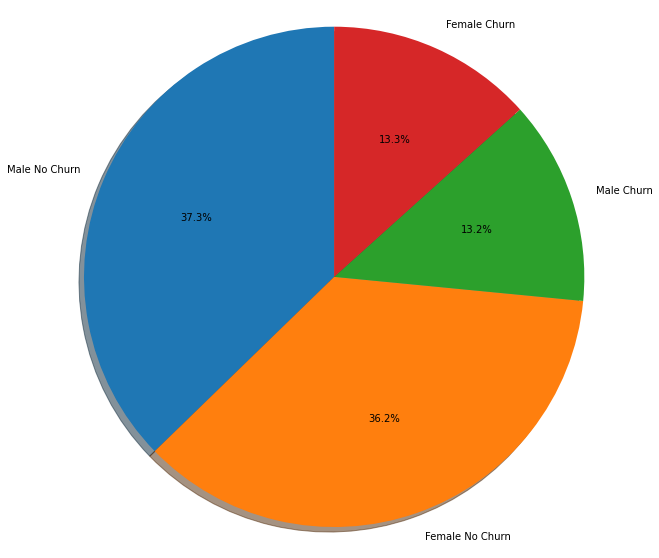

In [86]:
stat2('Gender',['Male','Female'])
labels=['Male No Churn','Female No Churn','Male Churn','Female Churn']
pieBinary('Gender',['Male','Female'],labels)
#The gender column has no effect

####  Result : The gender column has no effect  

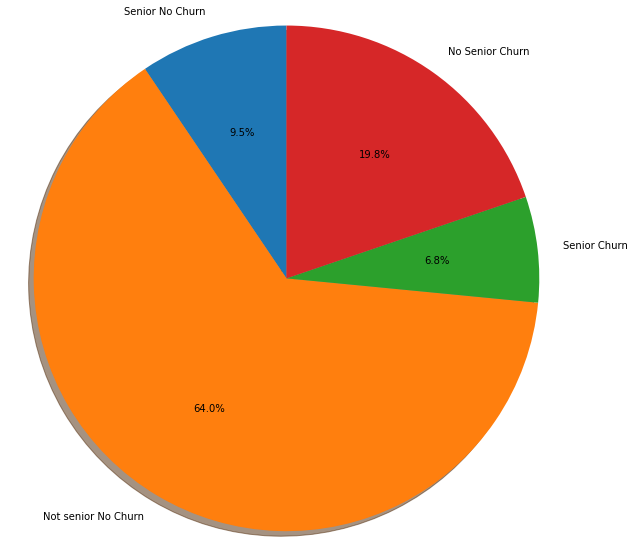

Yes  no churners : 666
No no churners : 4508
Yes churners : 476
No  chuners : 1393


In [87]:
labels=['Senior No Churn','Not senior No Churn','Senior Churn','No Senior Churn']
pieBinary('Senior Citizen',['Yes','No'],labels)
stat2('Senior Citizen',['Yes','No'])


#### Result : As we can see the younger population tend to churn more

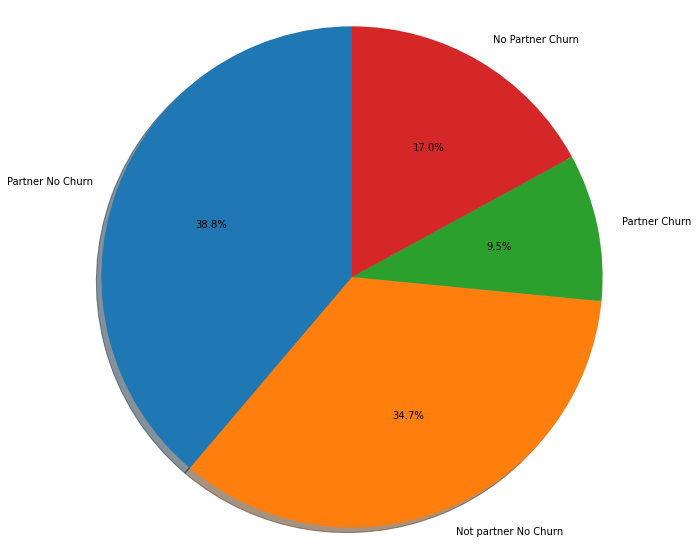

Yes  no churners : 2733
No no churners : 2441
Yes churners : 669
No  chuners : 1200


In [88]:
labels=['Partner No Churn','Not partner No Churn','Partner Churn','No Partner Churn']
pieBinary('Partner',['Yes','No'],labels)
stat2('Partner',['Yes','No'])

#### Single people tend to churn more

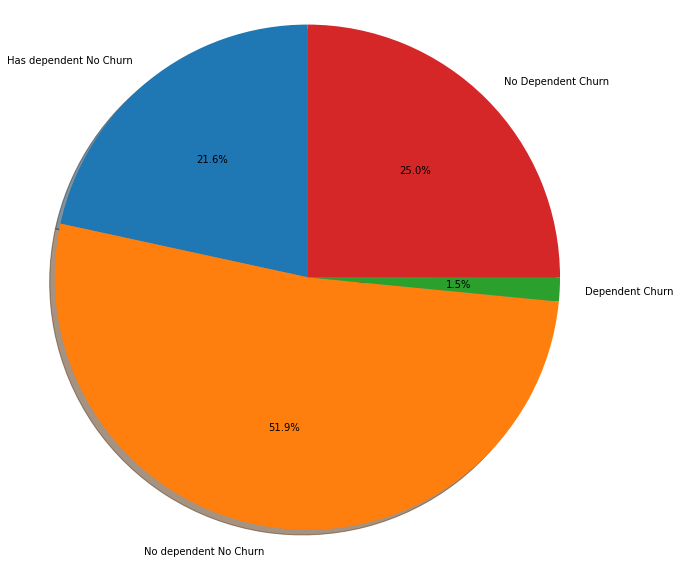

Yes  no churners : 1521
No no churners : 3653
Yes churners : 106
No  chuners : 1763


In [18]:
labels=['Has dependent No Churn','No dependent No Churn','Dependent Churn','No Dependent Churn']
pieBinary('Dependents',['Yes','No'],labels)
stat2('Dependents',['Yes','No'])

####  Result : People without kids tend to churn more


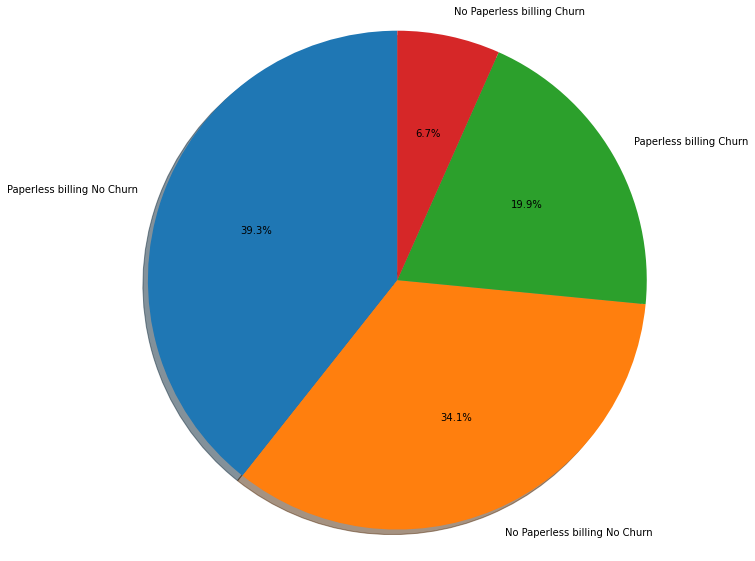

Yes  no churners : 2771
No no churners : 2403
Yes churners : 1400
No  chuners : 469


In [19]:
labels=['Paperless billing No Churn','No Paperless billing No Churn','Paperless billing Churn','No Paperless billing Churn']
pieBinary('Paperless Billing',['Yes','No'],labels)
stat2('Paperless Billing',['Yes','No'])

#### Result : People with paperless billing churn more 

## Figures for features with three values

In [20]:
def triplePie(colname,colvalues):
    oneNO = outcome_0[colname][outcome_0[colname]==colvalues[0]].shape[0] / data.shape[0] 
    twoNO = outcome_0[colname][outcome_0[colname]==colvalues[1]].size / data.shape[0] 
    threeNO = outcome_0[colname][outcome_0[colname]==colvalues[2]].size / data.shape[0] 
    
    oneYES = outcome_1[colname][outcome_1[colname]==colvalues[0]].shape[0] / data.shape[0]
    twoYES = outcome_1[colname][outcome_1[colname]==colvalues[1]].shape[0] / data.shape[0]
    threeYES = outcome_1[colname][outcome_1[colname]==colvalues[2]].shape[0] / data.shape[0]

    fracs=[oneNO,twoNO, threeNO,oneYES,twoYES,threeYES]

    labels=['No churn '+colvalues[0],'No churn '+colvalues[1],'No churn '+colvalues[2],
           ' churn '+colvalues[0],' churn '+colvalues[1],' churn '+colvalues[2]]
    fig1, ax1 = plt.subplots()
    ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig('pics/'+colname+'.png')
    plt.show()

## Statistics for categorical columns with 3 values

In [21]:
def stat3(col,choice):
    print(choice[0],' no churners :',outcome_0[col][outcome_0[col]==choice[0]].size)
    print(choice[1],'no churners :',outcome_0[col][outcome_0[col]==choice[1]].size)
    print(choice[2],'no churners :',outcome_0[col][outcome_0[col]==choice[2]].size)
    print(choice[0], 'churners :',outcome_1[col][outcome_1[col]==choice[0]].size)
    print(choice[1],' chuners :',outcome_1[col][outcome_1[col]==choice[1]].size)
    print(choice[2],' chuners :',outcome_1[col][outcome_1[col]==choice[2]].size)


C:\Users\khalil\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  from ipykernel import kernelapp as app


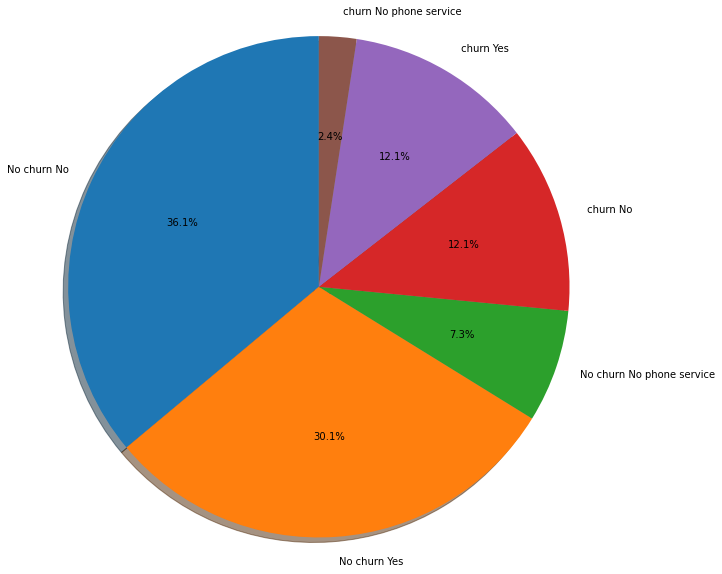

No  no churners : 2541
Yes no churners : 2121
No phone service no churners : 512
No churners : 849
Yes  chuners : 850
No phone service  chuners : 170


In [22]:
triplePie('Multiple Lines',['No', 'Yes','No phone service'])
stat3('Multiple Lines',['No', 'Yes','No phone service'])

#### Result : equal

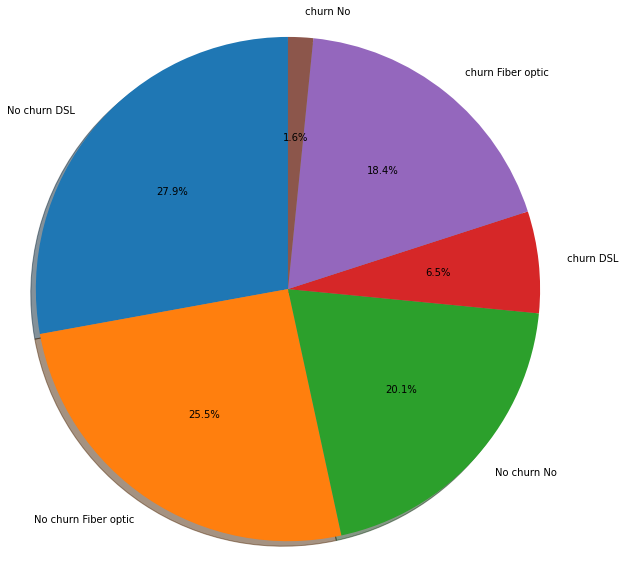

DSL  no churners : 1962
Fiber optic no churners : 1799
No no churners : 1413
DSL churners : 459
Fiber optic  chuners : 1297
No  chuners : 113


In [38]:
triplePie('Internet Service',['DSL', 'Fiber optic','No'])
stat3('Internet Service',['DSL', 'Fiber optic','No'])

#### Result : people with fiber optic churn more

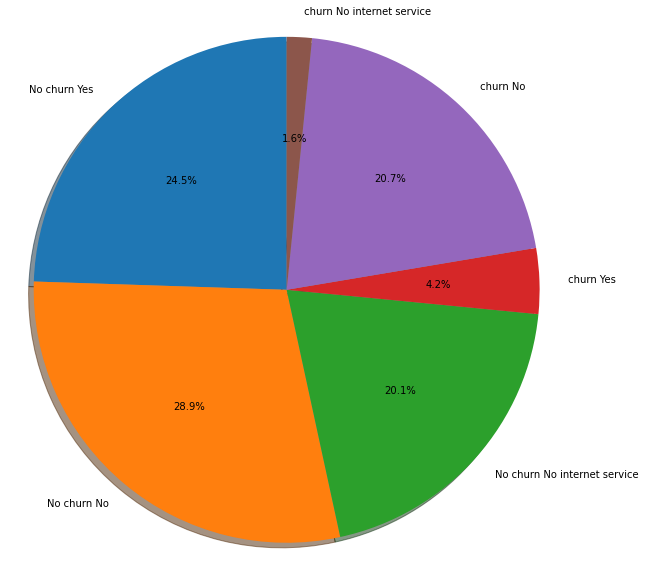

Yes  no churners : 1724
No no churners : 2037
No internet service no churners : 1413
Yes churners : 295
No  chuners : 1461
No internet service  chuners : 113


In [39]:
triplePie('Online Security',['Yes', 'No','No internet service'])
stat3('Online Security',['Yes', 'No','No internet service'])

#### Result : People without online security churn more

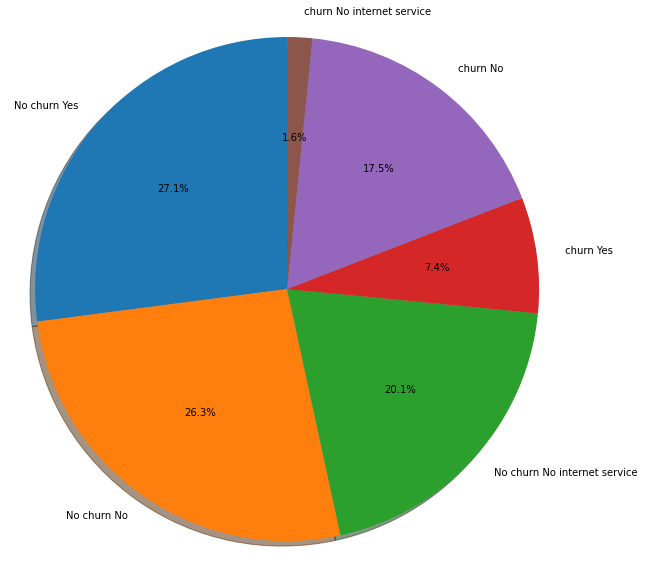

Yes  no churners : 1906
No no churners : 1855
No internet service no churners : 1413
Yes churners : 523
No  chuners : 1233
No internet service  chuners : 113


In [40]:
triplePie('Online Backup',['Yes', 'No','No internet service'])
stat3('Online Backup',['Yes', 'No','No internet service'])

#### Result : People without online backup churn more

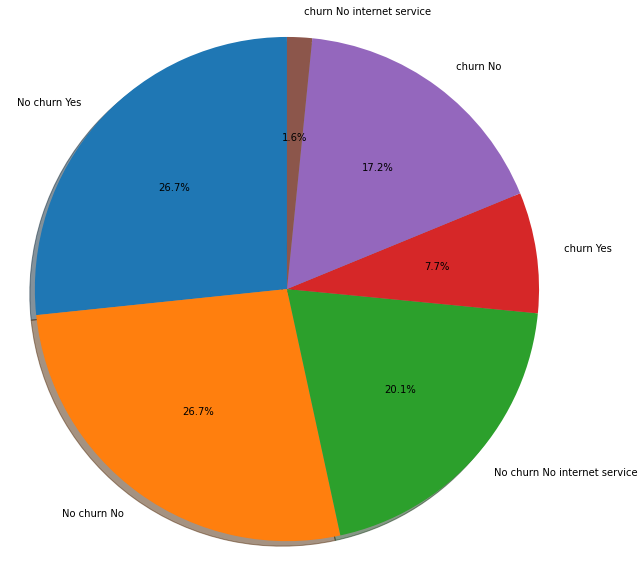

Yes  no churners : 1877
No no churners : 1884
No internet service no churners : 1413
Yes churners : 545
No  chuners : 1211
No internet service  chuners : 113


In [41]:
triplePie('Device Protection',['Yes', 'No','No internet service'])
stat3('Device Protection',['Yes', 'No','No internet service'])

#### Result : People without device protection churn more

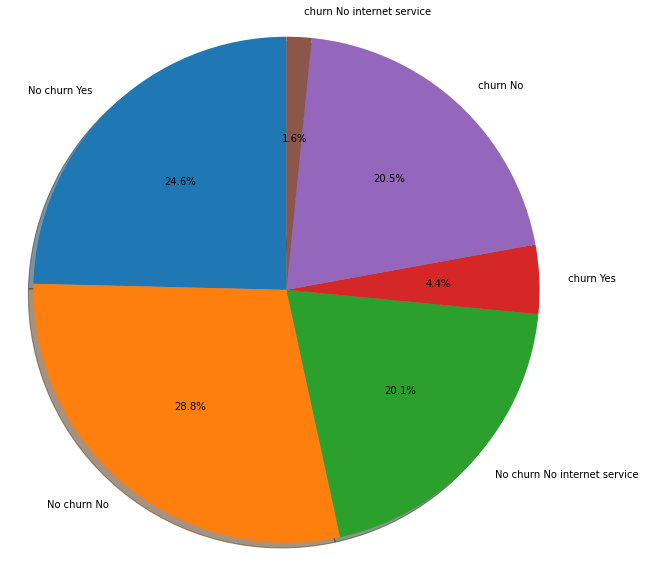

Yes  no churners : 1734
No no churners : 2027
No internet service no churners : 1413
Yes churners : 310
No  chuners : 1446
No internet service  chuners : 113


In [42]:
triplePie('Tech Support',['Yes', 'No','No internet service'])
stat3('Tech Support',['Yes', 'No','No internet service'])

#### Result : People without tech support churn more

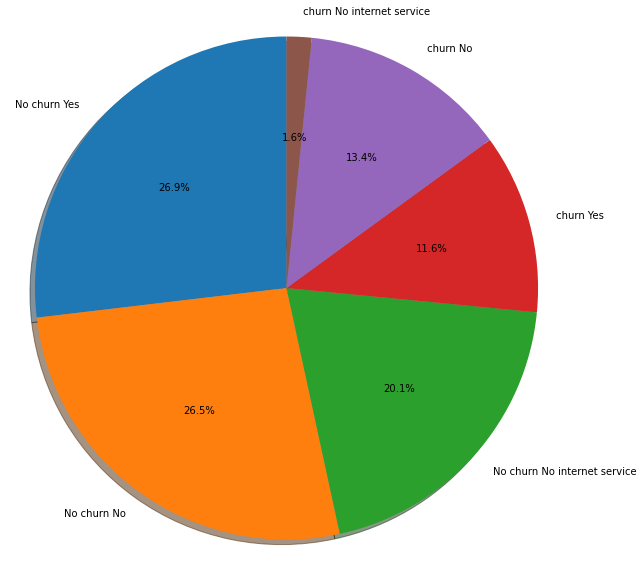

Yes  no churners : 1893
No no churners : 1868
No internet service no churners : 1413
Yes churners : 814
No  chuners : 942
No internet service  chuners : 113


In [43]:
triplePie('Streaming TV',['Yes', 'No','No internet service'])
stat3('Streaming TV',['Yes', 'No','No internet service'])

#### Result : equal

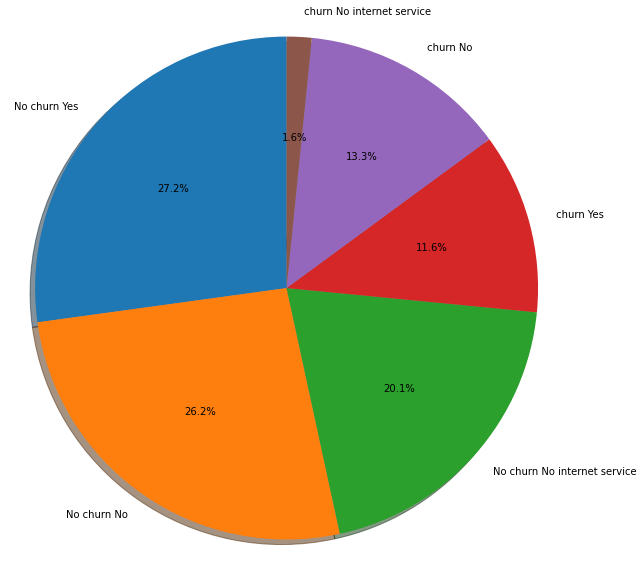

Yes  no churners : 1914
No no churners : 1847
No internet service no churners : 1413
Yes churners : 818
No  chuners : 938
No internet service  chuners : 113


In [44]:
triplePie('Streaming Movies',['Yes', 'No','No internet service'])
stat3('Streaming Movies',['Yes', 'No','No internet service'])

#### Result: equal

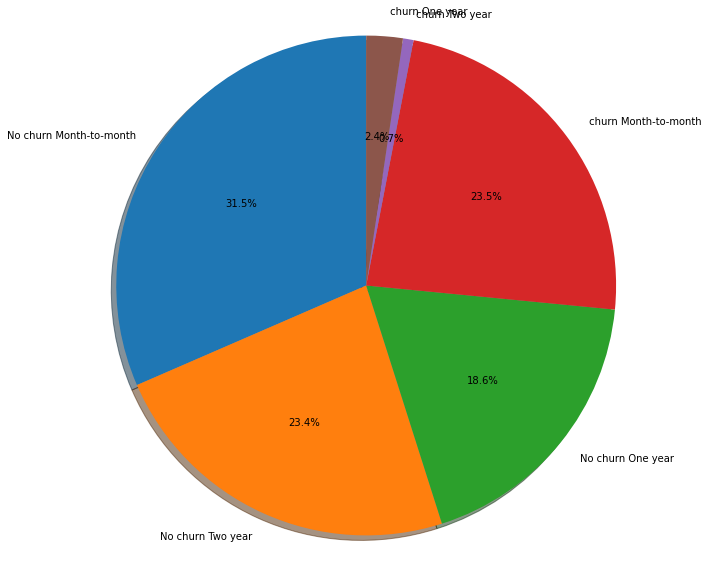

Month-to-month  no churners : 2220
Two year no churners : 1647
One year no churners : 1307
Month-to-month churners : 1655
Two year  chuners : 48
One year  chuners : 166


In [45]:
triplePie('Contract',['Month-to-month', 'Two year', 'One year'])
stat3('Contract',['Month-to-month', 'Two year', 'One year'])

#### People with month to month contracts churn more


##### Generally speaking, people without services churn more

## Figures for features with four values

In [46]:
def quadPie(colname,colvalues):

    oneYES = outcome_1[colname][outcome_1[colname]==colvalues[0]].shape[0] / outcome_1.shape[0]
    twoYES = outcome_1[colname][outcome_1[colname]==colvalues[1]].shape[0] / outcome_1.shape[0]
    threeYES = outcome_1[colname][outcome_1[colname]==colvalues[2]].shape[0] / outcome_1.shape[0]
    fourYES=outcome_1[colname][outcome_1[colname]==colvalues[3]].shape[0] / outcome_1.shape[0]
    fracs=[oneYES,twoYES,threeYES,fourYES]

    labels=[' churn '+colvalues[0],' churn '+colvalues[1],' churn '+colvalues[2],' churn '+colvalues[3]]
    fig1, ax1 = plt.subplots()
    ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig('pics/'+colname+'.png')
    plt.show()

## Statistics for features with 4 values

In [47]:
#churners
def stat4(col,choice):
    print(choice[0],' no churners :',outcome_0[col][outcome_0[col]==choice[0]].size)
    print(choice[1],'no churners :',outcome_0[col][outcome_0[col]==choice[1]].size)
    print(choice[2],'no churners :',outcome_0[col][outcome_0[col]==choice[2]].size)
    print(choice[3],'no churners :',outcome_0[col][outcome_0[col]==choice[3]].size)
   
    print(choice[0], 'churners :',outcome_1[col][outcome_1[col]==choice[0]].size)
    print(choice[1],' chuners :',outcome_1[col][outcome_1[col]==choice[1]].size)
    print(choice[2],' chuners :',outcome_1[col][outcome_1[col]==choice[2]].size)
    print(choice[3],' chuners :',outcome_1[col][outcome_1[col]==choice[3]].size)



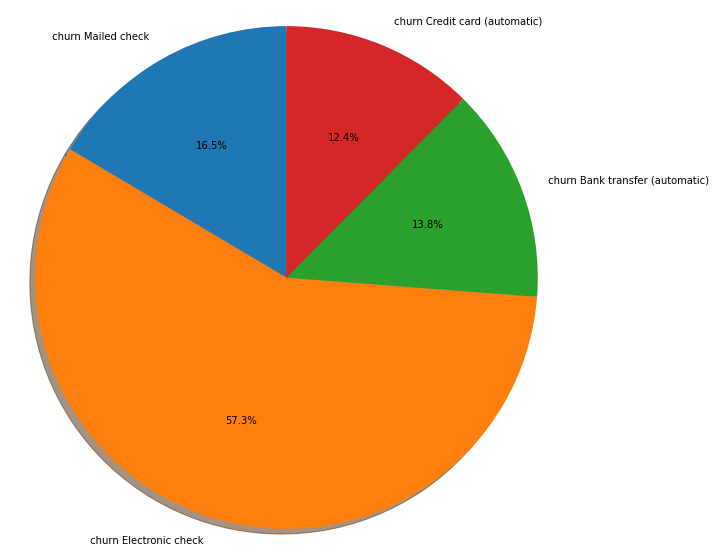

In [48]:
quadPie('Payment Method',['Mailed check', 'Electronic check' ,'Bank transfer (automatic)', 'Credit card (automatic)'])

#### Result : people with electronic checks churn more    

#  Data Cleaning


In [49]:
#SMOTE
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Missing values
from sklearn.impute import SimpleImputer
#Scaling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler,PowerTransformer,Normalizer,MaxAbsScaler

#Variance
import statistics 


#Modeling
from sklearn.model_selection import GridSearchCV,validation_curve
from sklearn.metrics import plot_confusion_matrix,roc_curve,roc_auc_score, classification_report,auc,precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import xgboost as xgb
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from lightgbm import LGBMClassifier


## Dependency test between categorical features and our target

In [50]:
def contingency(X):
    Y= "Churn Value"
   

    
    #Contingency table : for each value of Y, the respective total of X
    cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

    
    print('Feature : ',X)
    #Chi2 stat, we only need the p_value and the independency table which are st_p and st_exp
    st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
    print("P value = ",st_p)
    if(st_p>0.01):
        print('P-value > alpha : H0 variables independent, we can remove this column')
    else:
        print('P-Value < alpha : H1 ')
    
    
    indep=st_exp
    
    #The chi2 independency test relies on comparing the observed values against the expected ones with the following coefficient
    
    #coef = (n(i,j) - f(i)*n(j))² / (f(i)*n((j)))
    #the pvalue is the sum of that coefficient
    c = cont.fillna(0) # Replace null values with 0
    measure = (c-indep)**2/indep
    #For the heatmap, we divide the coeficients over total N 
    xi_n = measure.sum().sum() 
    table = measure/xi_n
    rcParams['figure.figsize'] = 7, 3
    sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],fmt="d")
    
    plt.show()
    
    

Feature :  Gender
P value =  0.9712873885521255
P-value > alpha : H0 variables independent, we can remove this column


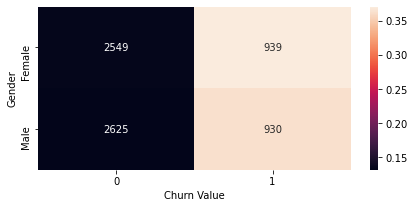

Feature :  Senior Citizen
P value =  1.2285843790939117e-33
P-Value < alpha : H1 


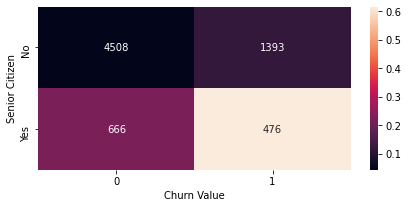

Feature :  Partner
P value =  1.952035040461347e-33
P-Value < alpha : H1 


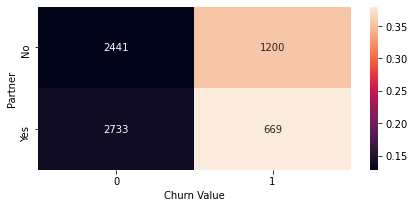

Feature :  Dependents
P value =  7.33676953988808e-93
P-Value < alpha : H1 


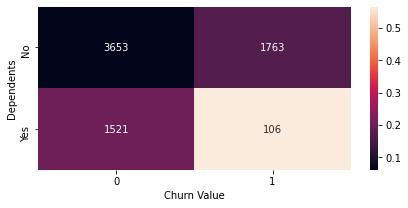

Feature :  Phone Service
P value =  0.9091267853074723
P-value > alpha : H0 variables independent, we can remove this column


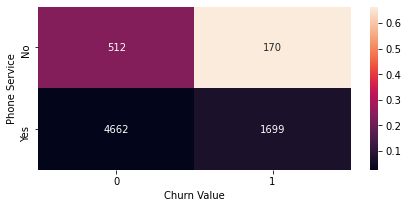

Feature :  Multiple Lines
P value =  0.07868508806403089
P-value > alpha : H0 variables independent, we can remove this column


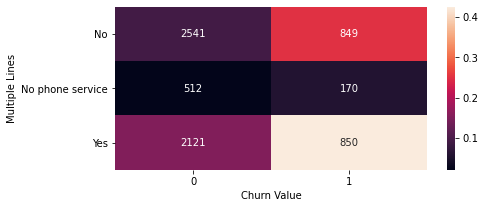

Feature :  Internet Service
P value =  6.451559630001854e-155
P-Value < alpha : H1 


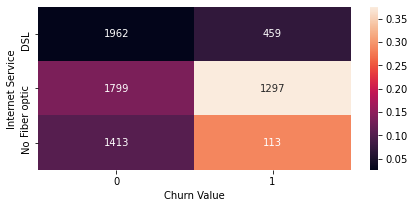

Feature :  Online Security
P value =  2.4146814118679796e-180
P-Value < alpha : H1 


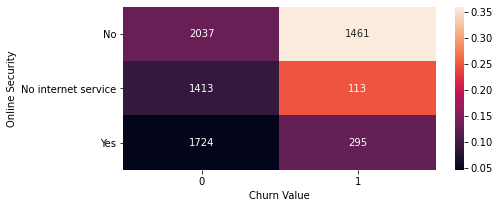

Feature :  Online Backup
P value =  9.47834366883598e-127
P-Value < alpha : H1 


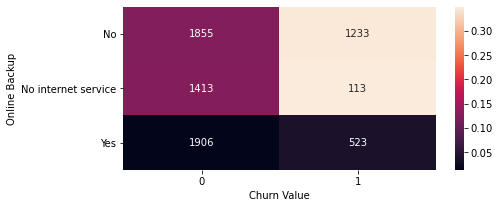

Feature :  Device Protection
P value =  2.1613069878600708e-117
P-Value < alpha : H1 


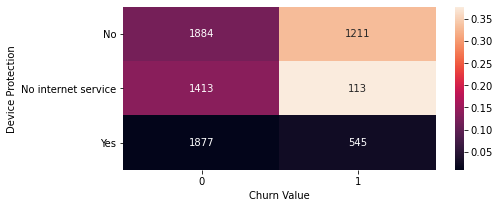

Feature :  Tech Support
P value =  1.2432731207524936e-175
P-Value < alpha : H1 


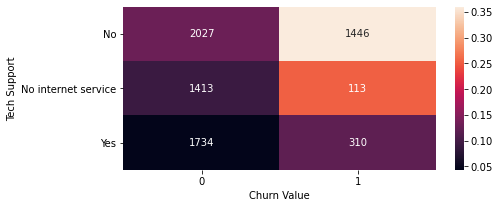

Feature :  Streaming TV
P value =  9.781717833060411e-78
P-Value < alpha : H1 


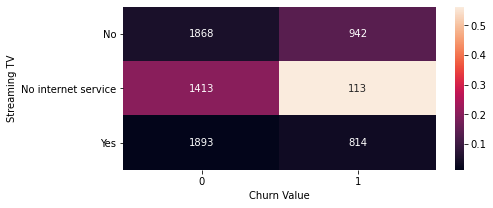

Feature :  Streaming Movies
P value =  4.756349955118015e-78
P-Value < alpha : H1 


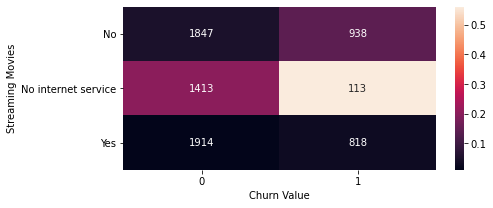

Feature :  Contract
P value =  1.0319060455020843e-252
P-Value < alpha : H1 


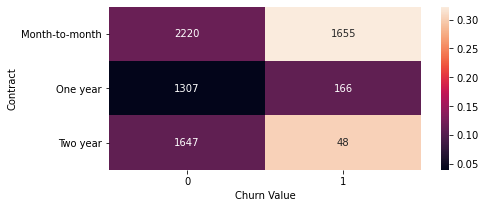

Feature :  Paperless Billing
P value =  6.914929538933956e-55
P-Value < alpha : H1 


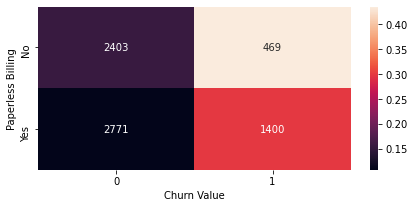

Feature :  Payment Method
P value =  1.0362827902735449e-134
P-Value < alpha : H1 


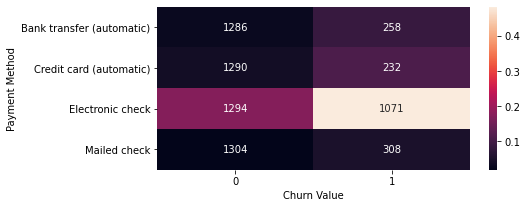

In [51]:
colqual=[ 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
        'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']
for i in colqual :
    contingency(i)

## Correlation between numerical features and our target

## Total charges = Tenure Months * Monthly Charges

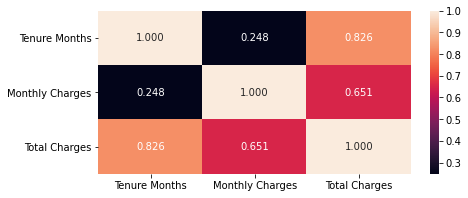

Mean of Total Charges :  2283.3004408418697
74 6969


In [52]:
dq=data.copy()

dcor=dq.loc[:,['Tenure Months','Monthly Charges','Total Charges']]

sns.heatmap(dcor.corr(), annot=True, fmt=".3f")
plt.show()
t=0
f=0
print("Mean of Total Charges : ",dcor['Total Charges'].mean())
for index,row in dq.iterrows() :
    if(abs(row['Total Charges']-row['Tenure Months']*row['Monthly Charges'])>220):
        t+=1
    else:
        f+=1
        
print(t,f)



#### We can see a strong correlation, thus we must remove the Total Charges feature
#### We confirmed with a 10% threshold that the formula is correct.

### Testing the correlation between the two remaining features and our target

(7043,)


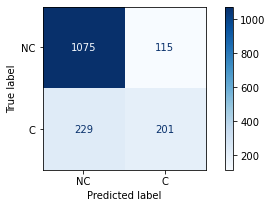

Le train score est : 0.7844366586760095
Le test score est : 0.7876543209876543
              precision    recall  f1-score   support

           0     0.8244    0.9034    0.8621      1190
           1     0.6361    0.4674    0.5389       430

    accuracy                         0.7877      1620
   macro avg     0.7302    0.6854    0.7005      1620
weighted avg     0.7744    0.7877    0.7763      1620



In [53]:
#num qual analysis




dq=data.copy()

dcor=dq.loc[:,['Tenure Months','Monthly Charges']]




Yq=dq.loc[:,'Churn Value'].values
dq=dq.drop(columns='Churn Value')
Xq=dq.loc[:,['Tenure Months','Total Charges','Monthly Charges']].values

imputers=SimpleImputer(missing_values=np.NaN,strategy='mean')

Xq=imputers.fit_transform(Xq)
print(Yq.shape)
X_train, X_test, y_train, y_test = train_test_split(Xq, Yq, test_size=0.23,random_state=420,stratify=Yq)

model = LogisticRegression(random_state=0).fit(X_train, y_train)
model.fit( X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, display_labels=['NC','C'], cmap=plt.cm.Blues)
plt.show()
print('Le train score est :', model.score(X_train, y_train))
print('Le test score est :', model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4,zero_division=0 ))


#### The features Montlhy Charges and Tenure Months must remain

## Checking outliers

##### Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

NameError: name 'dq' is not defined

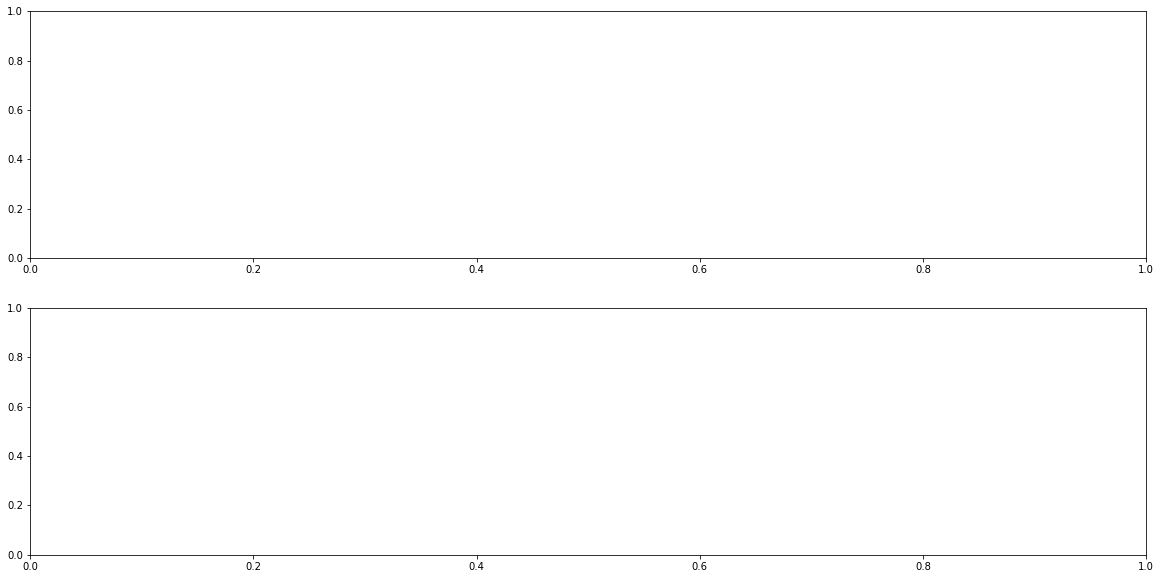

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize =(20, 10)) 
ax1 = sns.boxplot(x=dq.loc[:,"Monthly Charges"],ax=ax1)
ax2 = sns.boxplot(x=dq.loc[:,"Tenure Months"],ax=ax2)



#### Our data is evenly distributed, no outliers found

## Normality test

In [55]:
shapiro_test_1 = st.shapiro(dq.loc[:4999,"Monthly Charges"].values)
shapiro_test_2 = st.shapiro(dq.loc[:4999,"Tenure Months"].values)
print("Monthly Charges p-value =",shapiro_test_1[1])
print("Tenure Months p-value =",shapiro_test_2[1])



Monthly Charges p-value = 5.605193857299268e-45
Tenure Months p-value = 0.0


#### Both of our variables have a p-value < alpha (5%), so we accept H1 : the variables dont follow normal distribution 
##### We can confirm these results visually

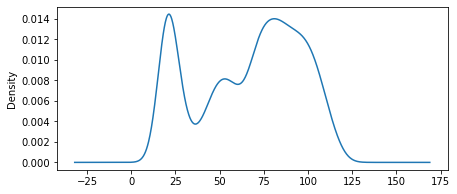

In [56]:
dq.loc[:4999,"Monthly Charges"].plot.kde()
plt.show()

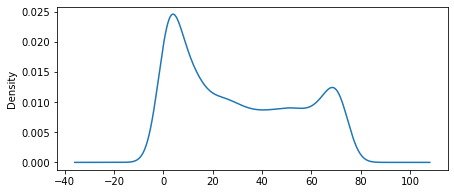

In [57]:
dq.loc[:4999,"Tenure Months"].plot.kde()
plt.show()

## Variance test

In [58]:

sample =dq.loc[:4999,"Monthly Charges"].values

print("Variance of Monthly Charges is % s" 
      %(statistics.variance(sample))) 


sample =dq.loc[:4999,"Tenure Months"].values

print("Variance of Tenure Months is % s" 
      %(statistics.variance(sample)))

Variance of Monthly Charges is 873.4753149828966
Variance of Tenure Months is 600


#### High variances

## Dropping columns



Droppping Irrelevant columns and columns that are not usefull in modeling and that may lead to overfitting.
So we dropped these  columns based on :
 - CustomerID : unique value  for every entry
 - Count      : same value for every entry 
 - Country    : same value in all rows "California"
 - State      : same value in all rows "Los Angeles"
 - Lat Long   : unique value for every entry / the combinaison of 2 features ('Latitude','Longitude')  
 - Latitude   : unique value for every entry 
 - Longitude  : unique value for every entry 
 - Zip Code   :  unique value for every entry 
 - Churn Label: same feature 'Churn Score' but labeled (yes or no values)
 - Total Charges : this feature is the result of multipling  2 other Features 'Monthly Charges ' and 'Tenure Months'
 - Churn Reason : descriptive feature of the result , uneeded for the predicting of the churn value, we also decided to drop rows with reasons 'Moved' and 'Deceased' because they are misleading
 - Gender, Multiple Lines and Phone Service : Since they are independent from our target
 
All the variable ('City','Lat Long','Latitude','Longitude','Churn Label','Zip Code') are **geolocation variables** so they are related , and they change at the same time , whenever one changes , the rest as well so it will be better to leave only one feature of them that does represent them all  which is the **'City'**.


 

In [59]:
#dropping Deceased and Moved Clients (Rows)
data = data[data['Churn Reason'] != 'Moved']
data = data[data['Churn Reason'] != 'Deceased']


data=data.drop(columns=['Total Charges','Gender','Phone Service','Multiple Lines','City','CustomerID','Count','Country','State','Lat Long','Latitude','Longitude','Churn Label','Zip Code','Churn Reason','Churn Score','CLTV'])
#Reorder columns for rest of transofrmations

data=data[[ 'Churn Value',
           'Monthly Charges', 'Tenure Months',
       
         'Senior Citizen', 'Partner', 'Dependents',
        
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']]

data.shape

(6984, 16)

#### Our remaining data consists only of 15 columns

## Data preparation 

In [60]:

#Main split
Y=data.loc[:,'Churn Value'].values
data=data.drop(columns='Churn Value')
X=data.loc[:,:].values

#Encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),slice(2,15))],remainder='passthrough')
X=np.array(ct.fit_transform(X))


#Missing values
imputer=SimpleImputer(missing_values=np.NaN,strategy='mean')
X=imputer.fit_transform(X)
print(X.shape)


#rearranging data for scaling (only 3 columns to scale so we shift them to front)
l=list(np.arange(0,38))
l.insert(0,36)
l.insert(1,37)
l.pop()
l.pop()
X=X[:,l]

#SMOTE
ros=SMOTE(random_state=0)
X, Y = ros.fit_resample(X, Y)

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.26,random_state=420,stratify=Y)

#Scaling (must be done after splitting data)
Scaler=RobustScaler()

X_train[:,0:2]=Scaler.fit_transform(X_train[:,0:2])
X_test[:,0:2]=Scaler.transform(X_test[:,0:2])

(6984, 38)


# Modeling 

## Confusion matrix and classification report 

In [61]:
def plot_confMatrix(model,X_train,y_train,X_test, y_test,name):    

    model.fit( X_train, y_train)
    plot_confusion_matrix(model, X_test, y_test, display_labels=['NC','C'], cmap=plt.cm.Blues)
    plt.show()
    
    print('Train score :', model.score(X_train, y_train))
    print('Test score  :', model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4 ))
    
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    print('Roc = ',roc_auc_score(y_test, y_pred_proba))

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim(-0.01, 1)
    plt.ylim(0, 1)
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    plt.show()
    
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred,average='binary', pos_label=1)
    scores = pd.DataFrame(columns=['Precision','Recall','F1','ROC','Train Score','Test Score'])
    scores.loc[name] = [precision, recall, f1
                        ,roc_auc_score(y_test, y_pred_proba)
                        ,model.score(X_train, y_train)
                        ,model.score(X_test, y_test)]
    print('----------------------------------------')
    
    print(scores)
    return scores



In [62]:
#Storing result in a variable
all_scores = pd.DataFrame()

### KNN

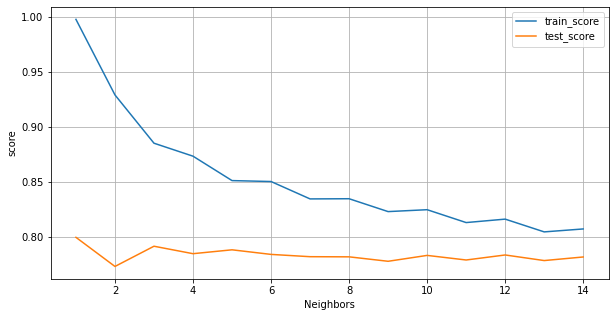

In [63]:
train_scores, test_scores= validation_curve(KNeighborsClassifier(),
                                            X_train, y_train, param_name='n_neighbors',
                                            param_range=np.arange(1,15), cv=5)
K=np.arange(1,15)
plt.figure(figsize=(10,5))
plt.plot(K, train_scores.mean(axis=1), K, test_scores.mean(axis=1))
plt.legend(('train_score', 'test_score'))
plt.xlabel('Neighbors')
plt.ylabel('score')
plt.grid(True)
plt.show()

In [64]:
param_grid = {'n_neighbors' : np.arange(5,15),
              'metric' : ['euclidean', 'manhattan','minkowski'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid , cv=5,n_jobs=-1)

grid.fit(X_train, y_train)
grid.best_params_
T1=grid.best_params_


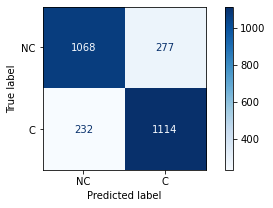

Train score : 0.8814156980540682
Test score  : 0.8108509847640283
              precision    recall  f1-score   support

           0     0.8215    0.7941    0.8076      1345
           1     0.8009    0.8276    0.8140      1346

    accuracy                         0.8109      2691
   macro avg     0.8112    0.8108    0.8108      2691
weighted avg     0.8112    0.8109    0.8108      2691

Roc =  0.8840899926534355


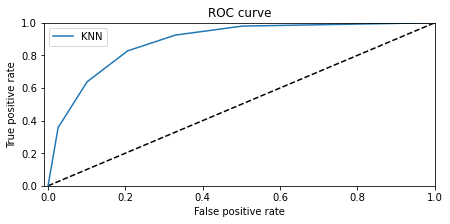

----------------------------------------
     Precision    Recall       F1      ROC  Train Score  Test Score
KNN   0.800863  0.827637  0.81403  0.88409     0.881416    0.810851


In [65]:

KNN = KNeighborsClassifier(n_neighbors=T1['n_neighbors']  ,metric=T1['metric'] ,algorithm=T1['algorithm'])
Res=plot_confMatrix(KNN,X_train,y_train,X_test, y_test,'KNN')

all_scores = all_scores.append(Res)

### Decision Tree

In [66]:
dt = DecisionTreeClassifier()
param_grid = {
              'criterion' : ['gini', 'entropy'],
              'splitter' : ['best', 'random'],
              'max_depth' : np.arange(1,15),              
             }
grid = GridSearchCV(dt, param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_
T2=grid.best_params_

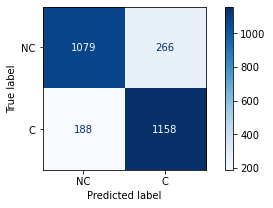

Train score : 0.8846806843411258
Test score  : 0.8312894834633965
              precision    recall  f1-score   support

           0     0.8516    0.8022    0.8262      1345
           1     0.8132    0.8603    0.8361      1346

    accuracy                         0.8313      2691
   macro avg     0.8324    0.8313    0.8311      2691
weighted avg     0.8324    0.8313    0.8311      2691

Roc =  0.8918411705894376


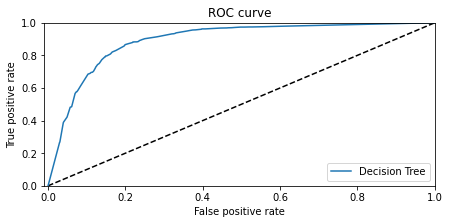

----------------------------------------
               Precision    Recall        F1       ROC  Train Score  \
Decision Tree   0.813202  0.860327  0.836101  0.891841     0.884681   

               Test Score  
Decision Tree    0.831289  


In [51]:

DT = DecisionTreeClassifier(criterion=T2['criterion']  ,splitter=T2['splitter'] ,max_depth=T2['max_depth'])
Res=plot_confMatrix(DT,X_train,y_train,X_test, y_test,'Decision Tree')
all_scores = all_scores.append(Res)

### Random Forest

In [67]:
RF = RandomForestClassifier()
param_grid = {
              'criterion' : ['gini', 'entropy'],             
              'max_depth' : np.arange(1,15),      
             }
grid = GridSearchCV(RF, param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_
T3=grid.best_params_

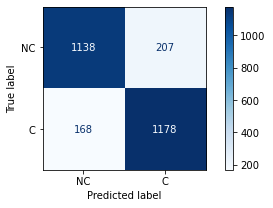

Train score : 0.9332636802925428
Test score  : 0.8606465997770345
              precision    recall  f1-score   support

           0     0.8714    0.8461    0.8585      1345
           1     0.8505    0.8752    0.8627      1346

    accuracy                         0.8606      2691
   macro avg     0.8610    0.8606    0.8606      2691
weighted avg     0.8609    0.8606    0.8606      2691

Roc =  0.9401103089423708


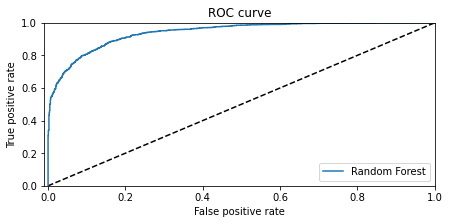

----------------------------------------
               Precision    Recall        F1      ROC  Train Score  Test Score
Random Forest   0.850542  0.875186  0.862688  0.94011     0.933264    0.860647


In [68]:

RF = RandomForestClassifier(criterion=T3['criterion'],max_depth=T3['max_depth'])
Res=plot_confMatrix(RF,X_train,y_train,X_test, y_test,'Random Forest')
all_scores = all_scores.append(Res)

### Gaussian Naive Bayes

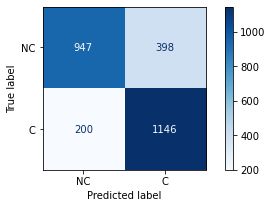

Train score : 0.7799399242523182
Test score  : 0.7777777777777778
              precision    recall  f1-score   support

           0     0.8256    0.7041    0.7600      1345
           1     0.7422    0.8514    0.7931      1346

    accuracy                         0.7778      2691
   macro avg     0.7839    0.7778    0.7766      2691
weighted avg     0.7839    0.7778    0.7766      2691

Roc =  0.8430746201052823


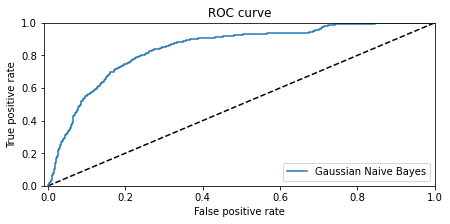

----------------------------------------
                      Precision    Recall       F1       ROC  Train Score  \
Gaussian Naive Bayes   0.742228  0.851412  0.79308  0.843075      0.77994   

                      Test Score  
Gaussian Naive Bayes    0.777778  


In [69]:
GNB = GaussianNB()
Res=plot_confMatrix(GNB,X_train,y_train,X_test, y_test,'Gaussian Naive Bayes')
all_scores = all_scores.append(Res)

### Bernoulli Naive Bayes

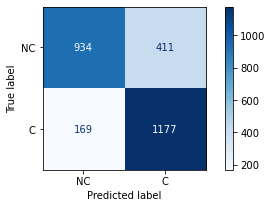

Train score : 0.7834661094423403
Test score  : 0.7844667409884801
              precision    recall  f1-score   support

           0     0.8468    0.6944    0.7631      1345
           1     0.7412    0.8744    0.8023      1346

    accuracy                         0.7845      2691
   macro avg     0.7940    0.7844    0.7827      2691
weighted avg     0.7940    0.7845    0.7827      2691

Roc =  0.8593166037881759


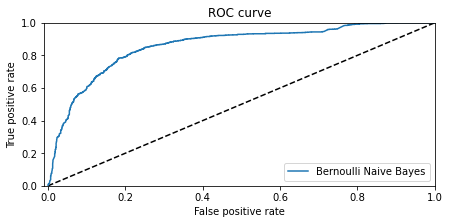

----------------------------------------
                       Precision    Recall        F1       ROC  Train Score  \
Bernoulli Naive Bayes   0.741184  0.874443  0.802318  0.859317     0.783466   

                       Test Score  
Bernoulli Naive Bayes    0.784467  


In [70]:
BNB =BernoulliNB()
Res=plot_confMatrix(BNB,X_train,y_train,X_test, y_test,'Bernoulli Naive Bayes')
all_scores = all_scores.append(Res)

### XGBOOST

In [71]:

param_grid=  { 'max_depth' : [3,4,5] , 
               'learning_rate': [0.1,0.01,0.05],
               'gamma' : [0,0.25,1.0] , 
               'reg_lambda' : [0 , 1.0,10.0,] , 
               'scale_pos_weight': [1,3,5]}

grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='logloss'), param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

grid.best_params_
T4=grid.best_params_

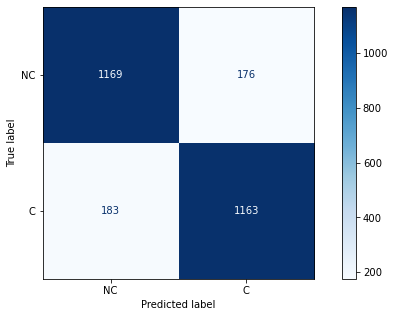

Train score : 0.8939532453963693
Test score  : 0.8665923448532145
              precision    recall  f1-score   support

           0     0.8646    0.8691    0.8669      1345
           1     0.8686    0.8640    0.8663      1346

    accuracy                         0.8666      2691
   macro avg     0.8666    0.8666    0.8666      2691
weighted avg     0.8666    0.8666    0.8666      2691

Roc =  0.9475717670973338


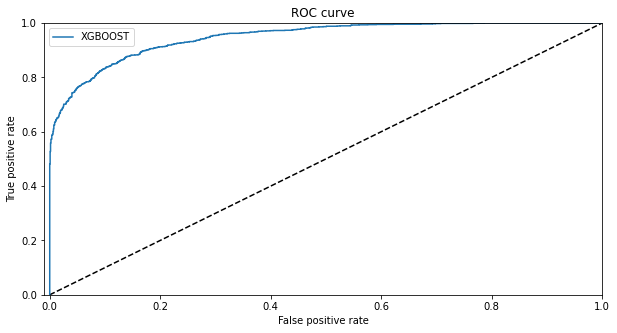

----------------------------------------
         Precision    Recall        F1       ROC  Train Score  Test Score
XGBOOST   0.868559  0.864042  0.866294  0.947572     0.893953    0.866592


In [91]:

XGB = xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='logloss'
    ,max_depth=T4['max_depth']  ,learning_rate=T4['learning_rate'] 
    ,gamma=T4['gamma'],reg_lambda=T4['reg_lambda'],scale_pos_weight=T4['scale_pos_weight'])
Res=plot_confMatrix(XGB,X_train,y_train,X_test, y_test,'XGBOOST')
all_scores = all_scores.append(Res)

### Support Vector Machine (SVM)

In [97]:
clfsvm = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  

grid = GridSearchCV(clfsvm, param_grid=param_grid , cv=5,scoring='f1',n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_
T5=grid.best_params_

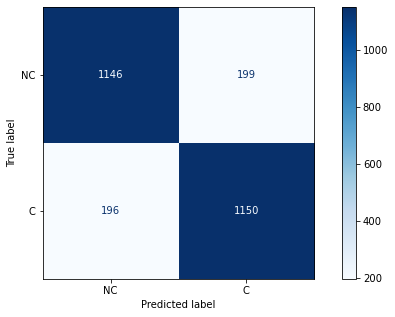

Train score : 0.8696617474206608
Test score  : 0.8532144184318098
              precision    recall  f1-score   support

           0     0.8539    0.8520    0.8530      1345
           1     0.8525    0.8544    0.8534      1346

    accuracy                         0.8532      2691
   macro avg     0.8532    0.8532    0.8532      2691
weighted avg     0.8532    0.8532    0.8532      2691

Roc =  0.9339908416511542


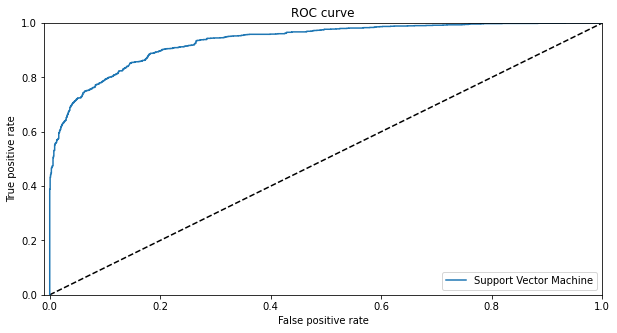

----------------------------------------
                        Precision    Recall        F1       ROC  Train Score  \
Support Vector Machine   0.852483  0.854383  0.853432  0.933991     0.869662   

                        Test Score  
Support Vector Machine    0.853214  


In [98]:

csvm = svm.SVC(C=T5['C']  ,gamma=T5['gamma'] ,kernel=T5['kernel'],probability=True)
Res=plot_confMatrix(csvm,X_train,y_train,X_test, y_test,'Support Vector Machine')
all_scores = all_scores.append(Res)

### Logistic Regression

In [99]:

clf = LogisticRegression() #Maximize the number of iterations so that it can converge

param_grid = {    'max_iter' : [50000],
                  'C': [0.1, 0.5, 1, 5, 10, 50, 100,150,200], 
                  "penalty":["l2"],
                  'dual' : [False]

                  }

grid = GridSearchCV(clf, param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_


{'C': 0.1, 'dual': False, 'max_iter': 50000, 'penalty': 'l2'}

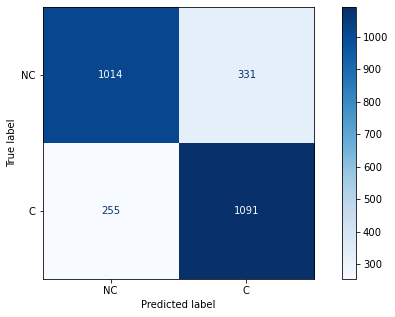

Train score : 0.7812459187671412
Test score  : 0.7822370865849126
              precision    recall  f1-score   support

           0     0.7991    0.7539    0.7758      1345
           1     0.7672    0.8105    0.7883      1346

    accuracy                         0.7822      2691
   macro avg     0.7831    0.7822    0.7821      2691
weighted avg     0.7831    0.7822    0.7821      2691

Roc =  0.8634671365521965


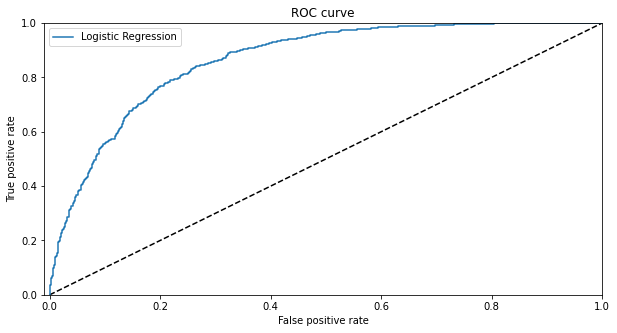

----------------------------------------
                     Precision   Recall        F1       ROC  Train Score  \
Logistic Regression   0.767229  0.81055  0.788295  0.863467     0.781246   

                     Test Score  
Logistic Regression    0.782237  


In [100]:
T6=grid.best_params_
clf = LogisticRegression(C=T6['C']  ,max_iter=T6['max_iter'] ,penalty=T6['penalty'],dual=T6['dual'])
Res=plot_confMatrix(clf,X_train,y_train,X_test, y_test,'Logistic Regression')
all_scores = all_scores.append(Res)

## Models Evaluation

In [101]:
L=[clf,XGB,DT,RF,KNN,GNB,csvm,BNB]
List=['LogisticRegression','XGBOOST','DecisionTree','RandomForest' , "KNN" , "GaussianNB" , "SVM","BNB"]
plt.figure(figsize=(14, 6))


for i,j in zip(L,List): 
    i.fit(X_train, y_train) 
    probs = i.predict_proba(X_test) 
    probs = probs[:, 1] 
    classifier_roc_auc= roc_auc_score(y_test, probs)
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, i.predict_proba(X_test)[:,1])
    plt.plot(rf_fpr, rf_tpr, label= j )
    print(j, ':' , auc(rf_fpr, rf_tpr))
    
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' )
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

NameError: name 'DT' is not defined

In [ ]:
all_scores.sort_values(by='F1', ascending=False)